<a href="https://colab.research.google.com/github/gustavolq/Imersao-Dados-Alura/blob/main/Projeto-Final/MoA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prevendo Ocorrência de um Mecanismo de Ação (MoA)**


[![Repositório GitHub](https://img.shields.io/badge/GitHub-gustavolq-blue.svg)](https://github.com/gustavolq)
[![Linkedin](https://img.shields.io/badge/Linkedin-gustavoquadra-blue.svg)](https://www.linkedin.com/in/gustavoquadra/)
[![Repositório do Projeto](https://img.shields.io/badge/RepositorioProjeto-ImersãoDadosAlura-blue.svg)](https://github.com/gustavolq/Imersao-Dados-Alura)

<p align="center">
  <img src = "https://mma.prnasia.com/media2/1283775/drug_discovery_pharma_data_science.jpg?p=publish" width = 70%>
</p>

Olá! Meu nome é Gustavo Luiz de Quadra e seja muito bem-vindo ao meu projeto final da Imersão de Dados 2021 da Alura!

Caso você tenha interesse em verificar o que foi aprendido nessa Imersão de Dados 2021, podes clicar [aqui](https://github.com/gustavolq/Imersao-Dados-Alura/blob/main/Aulas/Aulas_GustavoQuadra.ipynb) para acessar o meu Notebook com as aulas.

**Sumário do Projeto**

**1.** Introdução 

**2.** Definição do Problema de Negócio

**3.** Preparação dos Dados

**4.** Análise Exploratória dos Dados

**5.** Criação do Modelo de Machine Learning

**6.** Otimização do Modelo de Machine Learning

**7.** Conclusão

**8.** Agradecimento


#**1. Introdução**

O projeto proposto na Imersão de Dados 2021 foi baseado na competição [Kaggle - Mechanisms of Action (MoA) Prediction](https://www.kaggle.com/c/lish-moa/overview) criado pela [The Connectivity Map](https://clue.io/), um projeto do Broad Institute of MIT e Harvard, do Laboratory for Innovation Science em Harvard (LISH) e da Biblioteca de Fundos Comuns do NIH de assinaturas celulares integradas em rede (LINCS) com o objetivo de avanço no desenvolvimento de medicamentos por meio de melhorias nos algoritmos de previsão do MoA (Mecanismos de Ação).

###**1.1 O que é um Mecanismo de Ação (MOA) ?**

No passado, os cientistas derivavam drogas de produtos naturais ou eram inspirados por remédios tradicionais. Drogas muito comuns, como o paracetamol, foram colocadas em uso clínico décadas antes que os mecanismos biológicos que impulsionam suas atividades farmacológicas fossem compreendidos! 

Hoje, com o avanço de tecnologias mais poderosas, a descoberta de medicamentos mudou das abordagens inesperadas do passado para um modelo mais direcionado baseado na compreensão do mecanismo biológico subjacente de uma doença. 

Nessa nova estrutura, os cientistas buscam identificar um alvo proteico associado a uma doença e desenvolver uma molécula que possa modular essa proteína alvo. 

Para descrever a atividade biológica de uma determinada molécula, os cientistas atribuem um rótulo conhecido como **mecanismo de ação** ou, abreviadamente, **MoA**.

### **1.2 Como determinamos os MoAs de um novo medicamento?**

Uma abordagem é tratar uma amostra de células humanas com a droga, e em seguida, analisar as respostas celulares com algoritmos que buscam semelhança com padrões conhecidos em grandes bancos de dados genômicos, como bibliotecas de expressão gênica ou padrões de viabilidade celular de drogas com MoAs conhecidos.

### **1.3 Conceitos Biológicos**

Para um bom entendimento dos dados que serão apresentados ao longo do projeto, abaixo segue um dicionário de palavras utilizadas no campo da Biologia.

**1.3.1 Expressão Gênica**

Toda informação necessária para construir e manter vivo um organismo está guardada na mólecula de DNA.

Vamos utilizar o ser humano como exemplo. Dentro de cada célula, existem 46 moléculas de DNA, sendo 23 de origem materna e 23 de origem paterna. Nessas 46 móleculas estão os genes, sendo aproximadamente 20.000 (20 mil) deles.

Um gene é um trecho de DNA que contém a informação para a produção, de proteínas (exemplos : insulina, anticorpos, hemoglobina, lactase, actina, colágeno)

![imagem](https://drive.google.com/uc?id=1dCRFqDYdQHq7ZqBgnrpn_VyGm0fHHB6-)

O que chamamos de expressão gênica é o processo pelo qual a informação biológica de um gene, é copiada para um RNA, sendo transportado para fora do núcleo da célula e lido pelo ribossomo que realiza a sintetização da proteína.

A regulação da expressão gênica é algo extremamente importante para o bom funcionamento da célula e do organismo, pois, a célula é capaz de aumentar ou diminuir a criação de proteínas de acordo com a necessidade.

Quando a célula precisa aumentar a produção de uma proteína, ocorre o aumento da expressão do gene que contém a receita da proteína. Se a célula não precisa mais da proteína, realiza a diminuição da expressão.

Conforme podemos verificar na imagem abaixo, possuímos uma célula, que possui em condições normais a produção de 4 proteínas (Expressão gênica = 1), à medida que é submetida à compostos (composto 1 e composto 2) realiza a alteração na produção das proteínas, podendo aumentar o dobro (Expressão gênica = 2) ou diminuir pela metade (Expressão gênica = 1).

![imagem2](https://drive.google.com/uc?id=1tVSBA6_5tANy9MPN8LFjAch6j1BOk7GD)

**1.3.2 Viabilidade Celular**

A viabilidade celular é uma medida de proporção de células vivas saudáveis dentro de uma população, analisando células metabolicamente ativas em uma cultura celular, a fim de avaliar sua atividade qualitativa e quantitativamente.

1.3.3 Mecanismo de Ação (MoA)

O Mecanismo de Ação, abreviado de MoA, é a interação bioquímica entre uma droga utilizada e um alvo.

#**2. Definição do Problema de Negócio**

Neste projeto, utilizaremos 2 (dois) conjuntos de dados, sendo o primeiro, a combinação de valores entre a expressão gênica e os dados de viabilidade celular de um experimento. O segundo conjunto de dados demonstrará os mecanismos de ações que foram ativados a partir de um experimento.

###**2.1 Objetivo do Projeto**

Como objetivo do projeto, realizaremos a criação de um modelo de Machine Learning para prever se um composto teve a ativação ou não de um Mecanismo de Ação em um experimento.

#**3. Preparação dos Dados**

### **3.1 Importação dos Pacotes Utilizadas**

A importação dos pacotes é um passo para podermos utilizar comandos para situações específicas, como carregamento dos dados, criação de gráficos e até a criação de um modelo em Machine Learning.

Entende-se como pacote um conjunto de funções escritos em uma linguagem de programação.

In [ ]:
# Pacote para carregamento de dados
import pandas as pd

# Pacote para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Setar a utilização do seaborn para demonstrar o gráfico.

# Pacote para matemática
import numpy as np

# Pacotes para Machine Learning (divisão de dados, acurácia e modelos)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

###**3.2 Importando os Dados**

Para realizar a importação dos dados, utilizaremos a função ```pd.read_csv``` do pacote ```pandas``` que importamos anteriormente.

Esses dados estão armazenados no meu repositório do GitHub, onde você pode verificar clicando [aqui](https://github.com/gustavolq/Imersao-Dados-Alura/blob/main/Dados).

In [ ]:
url_dados_experimentos = "https://github.com/gustavolq/Imersao-Dados-Alura/blob/main/Dados/dados_experimentos.zip?raw=true"
url_dados_MoA = "https://github.com/gustavolq/Imersao-Dados-Alura/blob/main/Dados/dados_resultados.csv?raw=true"

dados_experimentos = pd.read_csv(url_dados_experimentos, compression='zip')
dados_MoA = pd.read_csv(url_dados_MoA)

####**3.2.1 Dados Experimentos**

Conforme verificado com os comandos abaixo, possuímos **23814 linhas e 877 colunas** para a nossa tabela de experimentos.

As colunas estão divididas em :

- id : Identificador do experimento.
- tratamento : Se o experimento foi utilizado alguma droga ou apenas o controle.
- tempo : Tempo em que o experimento ficou exposto à uma droga ou controle (24, 48 ou 72).
- dose : Demonstra qual dose foi aplicada (D1 ou D2).
- droga : Demonstra qual droga foi utilizada no experimento (valores encriptografados).
- g-n : Expressão gênica.
- c-n : Viabilidade celular.

In [ ]:
print(f'A tabela de experimentos possui {dados_experimentos.shape[0]} linhas e {dados_experimentos.shape[1]} colunas.')

# Para fins de melhor exemplificação da tabela estou pedindo para retornar as primeiras 5 linhas.
dados_experimentos.head()

A tabela de experimentos possuí 23814 linhas e 877 colunas.


,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Buscando uma melhor nomenclatura para representação dos nossos compostos, alteraremos o nome da coluna ```droga``` para ```composto```

Também realizaremos a remoção dos hífens (-) para as colunas ```g-n``` e ```c-n```, pois podem atrapalhar em alguns comandos que realizaremos.

In [ ]:
# Alteração do nome de nossa coluna 
dados_experimentos.rename(columns = {"droga" : "composto"}, inplace=True)

# Remoção do hífen (-) das colunas
dados_experimentos.columns = dados_experimentos.columns.str.replace("-", "")

# Primeiras 5 linhas da nossa tabela
dados_experimentos.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


####**3.2.2 Dados MoA**

Conforme verificado com os comandos abaixo, possuímos **23814 linhas e 207 colunas** em nossa tabela de mecanismos de ação.

A tabela de mecanismo de ação possui a coluna ID (a mesma da tabela de experimentos, por isso possuímos a mesma quantidade de linhas) e diferentes tipos de MoA, sendo 0 para não ativação e 1 para ativação. 

**Obs : A partir desse ponto, utilizarei a sigla MoA para referir aos mecanismos de ação.**

In [ ]:
print(f'A tabela de mecanismos de ação possui {dados_MoA.shape[0]} linhas e {dados_MoA.shape[1]} colunas.')
dados_MoA.head()

A tabela de mecanismos de ação possuí 23814 linhas e 207 colunas.


,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **4. Análise Exploratória dos Dados**

Na etapa de Análise Exploratória dos Dados vamos buscar entender a disposição e as características dos dados dentro do nosso dataset, além de extrair insights que possam auxiliar em nossa criação do modelo preditivo.

###**4.1 Análise Exploratória Dados Experimentos**

Nesse ponto, iremos realizar uma Análise Exploratória em nossa tabela de experimentos, buscando entender melhor como estão distribuídos nossas variáveis e se as mesmas estão interligadas de alguma forma.

####**4.1.1 Análise Exploratória das Variáveis Categóricas**

Primeiro, iremos realizar uma análise exploratória em nossas variáveis que possuem categoria (podem assumir valores em um range fixo), sendo essas, as colunas ```tratamento```, ```tempo```, ```dose``` e ```composto```.

Agora, iremos realizar uma verificação em quais são os valores e a quantidade de valores únicos que cada variável categórica pode assumir em nossa tabela.

Após essa verificação, podemos verificar que as colunas ```tratamento```, ```tempo``` e ```dose``` estão muito bem definidas, possuíndo apenas 2 ou 3 valores.

Já a coluna ```composto``` possui 3289 valores diferentes, o que dificulta um pouco a nossa compreensão nas proporções de cada valor em nossa tabela.

In [ ]:
print(f'Valores da coluna tratamento : {dados_experimentos["tratamento"].unique()}')
print(f'Quantidade de valores que a coluna tratamento pode assumir : {dados_experimentos["tratamento"].nunique()}\n')

print(f'Valores da coluna tempo : {dados_experimentos["tempo"].unique()}')
print(f'Quantidade de valores que a coluna tempo pode assumir : {dados_experimentos["tempo"].nunique()}\n')

print(f'Valores da coluna dose : {dados_experimentos["dose"].unique()}')
print(f'Quantidade de valores que a coluna dose pode assumir : {dados_experimentos["dose"].nunique()}\n')

print(f'Valores da coluna composto :{dados_experimentos["composto"].unique()}')
print(f'Quantidade de valores que a coluna composto pode assumir : {dados_experimentos["composto"].nunique()}')

Valores da coluna tratamento : ['com_droga' 'com_controle']
Quantidade de valores que a coluna tratamento pode assumir : 2

Valores da coluna tempo : [24 72 48]
Quantidade de valores que a coluna tempo pode assumir : 3

Valores da coluna dose : ['D1' 'D2']
Quantidade de valores que a coluna dose pode assumir : 2

Valores da coluna composto :['b68db1d53' 'df89a8e5a' '18bb41b2c' ... '573c787a2' 'b2fe3eca7'
 'dd4a96d16']
Quantidade de valores que a coluna composto pode assumir : 3289


Agora, realizaremos a verificação da quantidade de cada valor para entendermos como está a proporção de utilização em nossa tabela.

Primeiro, iremos começar com a nossa coluna ```tratamento```, onde podemos notar uma disparidade entre a quantidade de valores ```com_droga (21948)``` e ```com_controle (1866)```.

Essa disparidade é explicada porque podemos aplicar diferentes drogas em um experimento para verificar a reação de um grupo de células. Já o tratamento com controle é um método que verificamos como o grupo de células se comporta em uma situação.

Quantidade de cada valor da variável tratamento 
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64



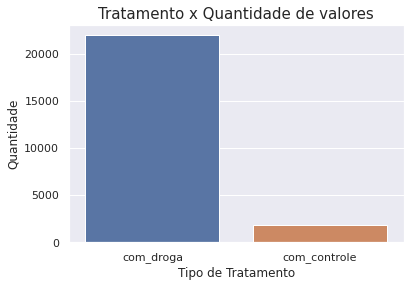

In [ ]:
print(f'Quantidade de cada valor da variável tratamento \n{dados_experimentos["tratamento"].value_counts()}\n')

sns.countplot(x = 'tratamento', data = dados_experimentos)

plt.title("Tratamento x Quantidade de valores", fontsize = 15)
plt.xlabel("Tipo de Tratamento", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 12)
plt.xticks(rotation = 0)

plt.show()

Também podemos verificar a quantidade de cada valor das variáveis ```tempo``` e ```dose```, mas não possuímos informação necessária para tirar um insight dessas quantidades, pois, as mesmas estão aproximadamente equivalentes.

Quantidade de cada valor da variável tempo 
48    8250
72    7792
24    7772
Name: tempo, dtype: int64



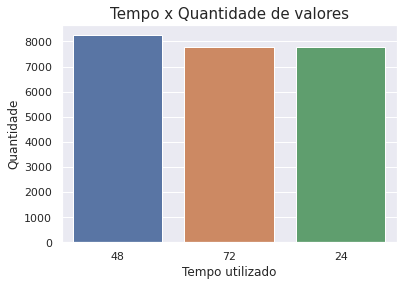

In [ ]:
print(f'Quantidade de cada valor da variável tempo \n{dados_experimentos["tempo"].value_counts()}\n')

sns.countplot(x = 'tempo', data = dados_experimentos, order=dados_experimentos['tempo'].value_counts().index)

plt.title("Tempo x Quantidade de valores", fontsize = 15)
plt.xlabel("Tempo utilizado", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 12)
plt.xticks(rotation = 0)

plt.show()

Quantidade de cada valor da variável dose 
D1    12147
D2    11667
Name: dose, dtype: int64



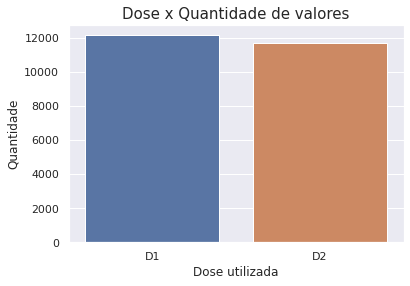

In [ ]:
print(f'Quantidade de cada valor da variável dose \n{dados_experimentos["dose"].value_counts()}\n')

sns.countplot(x = 'dose', data = dados_experimentos, order=dados_experimentos['dose'].value_counts().index)
plt.title("Dose x Quantidade de valores", fontsize = 15)
plt.xlabel("Dose utilizada", fontsize = 12)
plt.ylabel("Quantidade", fontsize = 12)
plt.xticks(rotation = 0)
plt.show()

Outra informação importante que podemos trazer referente às variáveis categóricas definidas, é saber quais combinações foram mais frequentes em nossa tabela.

Essa informação podemos trazer utilizando uma tabulação cruzada de valores.

Podemos identificar com o comando abaixo, que a maior quantidade de valores combinados para os nossos experimentos foram de **D1 (dose) + 48 (tempo) + com_droga (tratamento)** com **4011** ocorrências em nossa tabela.

In [ ]:
pd.crosstab([dados_experimentos['dose'], dados_experimentos['tempo']], dados_experimentos['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Para a análise da variável **```droga```**, formularemos algumas perguntas para respondermos : 

- **Quais os compostos mais utilizados em nossos experimentos?**
- **Temos um composto envolvido em tratamento com controle e caso tenha, é interessante demonstrar nos gráficos?**
- **Quais os 30 compostos mais utilizados em nossos experimentos?**

####**Quais os compostos mais utilizados em nossos experimentos?**

Conforme comando abaixo, podemos verificar que os compostos ```cacb2b860```e ```87d714366``` são os compostos mais utilizado em nossos experimentos.

In [ ]:
dados_experimentos['composto'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
2b06f0b4b       1
c1292b6d8       1
b472193a9       1
0e6ee26ff       1
f0d1b8dbc       1
Name: composto, Length: 3289, dtype: int64

####**Temos um composto envolvido em tratamento com controle e caso tenha, é interessante demonstrar nos gráficos de compostos mais utilizados?**

Para resolver essa questão, podemos dividir a nossa coluna filtrando pelos dados que possuem a coluna ```tratamento``` igual à ```com_controle```, após isso podemos realizar a contagem dos valores da coluna ```composto```.

Após rodarmos o comando, podemos verificar que existem 1866 valores para o composto ```cacb2b860```, sendo esse o único composto no tratamento com controle.

In [ ]:
dados_experimentos.query('tratamento == "com_controle"')['composto'].value_counts()

cacb2b860    1866
Name: composto, dtype: int64

**Mas que conclusão podemos chegar com isso?**

Em situações de tratamento com controle não é realizada a adição de um composto, sendo o valor ```cacb2b860``` (maior valor verificado anteriormente) provavelmente um placebo ou apenas um valor para representar que não foram utilizados compostos.

Visto que esse valor corresponde à uma ausência de composto, não é interessante utilizarmos o mesmo para verificar a quantidade de compostos utilizados.

####**Quais os 30 compostos mais utilizados em nossos experimentos?**

Realizando a exclusão dos tratamentos com controle, podemos realizar a construção de um gráfico para identificarmos os 30 maiores valores, sendo os 8 primeiros os únicos que passam de 100 observações!

Infelizmente, não temos como saber quais compostos são esses, pois os valores são encriptografados.

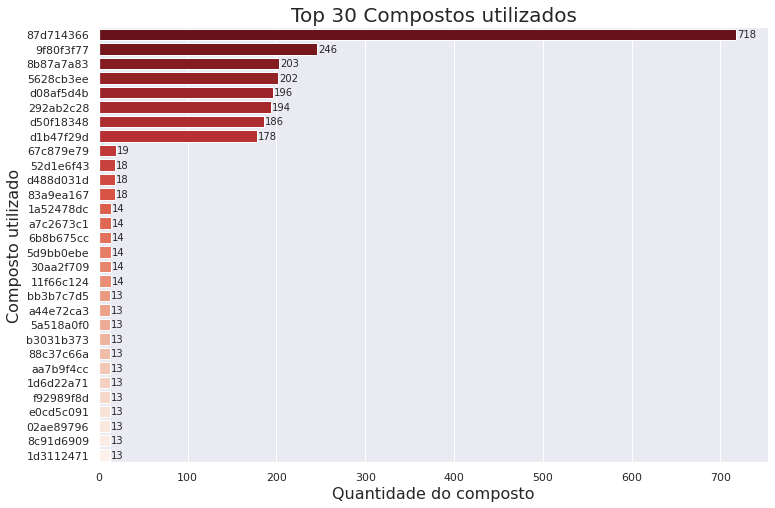

In [ ]:
dados_experimentos_comdroga = dados_experimentos.query('tratamento == "com_droga"')

dados_composto_30 = dados_experimentos_comdroga["composto"].value_counts().head(30).index
dados_composto_30 = dados_experimentos_comdroga.query('composto in @dados_composto_30')

plt.figure(figsize = (12,8))
ax = sns.countplot(y = "composto", data = dados_composto_30, palette = "Reds_r", order=dados_experimentos_comdroga["composto"].value_counts().head(30).index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

plt.xlabel("Quantidade do composto", fontsize = 16)
plt.ylabel("Composto utilizado", fontsize = 16)
plt.title("Top 30 Compostos utilizados", fontsize = 20)
plt.show()

Verificando a quantidade dos 8 compostos mais utilizados, podemos realizar a separação de cada um por tempo, onde podemos verificar que o **tempo de 48** se sobressai aos outros.

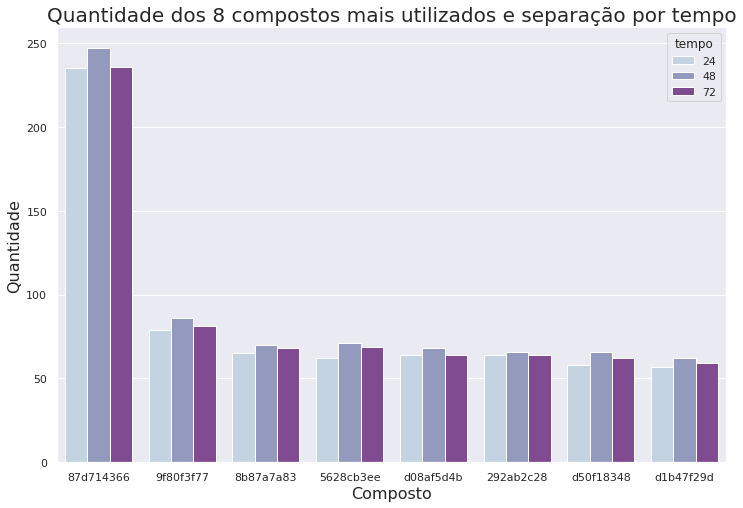

In [ ]:
dados_composto_8 = dados_experimentos_comdroga["composto"].value_counts().head(8).index
dados_comdroga_8 = dados_experimentos.query('composto in @dados_composto_8')

plt.figure(figsize = (12,8))
sns.countplot(x = "composto", data = dados_comdroga_8, palette = "BuPu", order=dados_composto_8, hue = 'tempo')
plt.xlabel('Composto', fontsize = 16)
plt.ylabel('Quantidade', fontsize = 16)
plt.title('Quantidade dos 8 compostos mais utilizados e separação por tempo', fontsize = 20)
plt.show()

####**4.1.2 Análise Exploratória das Variáveis Numéricas**

Após realizarmos a exploração das variáveis categóricas, iremos realizar a exploração das variáveis numéricas.

As variáveis numéricas correspondem aos valores que podem assumir qualquer valor numérico, sendo elas as colunas ```gn (expressões gênicas)``` e ```cn (viabilidades celular```).

Formularemos algumas questões que serão respondidas durante essa fase : 
- **O que podemos verificar com a distribuição dos valores estatísticos dessas colunas?**
- **Existe uma correlação entre os valores ```gn``` e ```cn``` ?**
- **Dependendo da dose, tratamento e tempo, ocorre alguma diferença nos valores?**

####**O que podemos verificar com a distribuição dos valores estatísticos dessas colunas?**

Realizando algumas análises nas variáveis da coluna ```gn (g0 à g771)``` podemos identificar que provavelmente foram setados valores mínimos e máximos manualmente, visto que seus valores estão entre -10 e 10.

Podemos verificar também que o gráfico de média e desvio padrão demonstra um gráfico de distribuição normal, onde os valores tendem a ficar muito próximos à média.

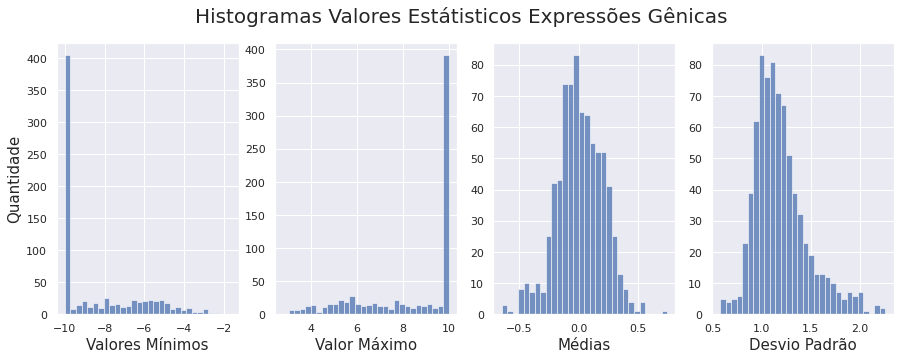

In [ ]:
fig, ax = plt.subplots(1,4,figsize = (15,5))

sns.histplot(x = 'min', data = dados_experimentos.loc[:,'g0':'g771'].describe().T, bins = 30, ax=ax[0])
sns.histplot(x = 'max', data = dados_experimentos.loc[:,'g0':'g771'].describe().T, bins = 30, ax=ax[1])
sns.histplot(x = 'mean', data = dados_experimentos.loc[:,'g0':'g771'].describe().T, bins = 30, ax=ax[2])
sns.histplot(x = 'std', data = dados_experimentos.loc[:,'g0':'g771'].describe().T, bins = 30, ax=ax[3])

ax[0].set_xlabel("Valores Mínimos", fontsize = 15)
ax[0].set_ylabel("Quantidade", fontsize = 15)

ax[1].set_xlabel("Valor Máximo", fontsize = 15)
ax[1].set_ylabel("")

ax[2].set_xlabel("Médias", fontsize = 15)
ax[2].set_ylabel("")

ax[3].set_xlabel("Desvio Padrão", fontsize = 15)
ax[3].set_ylabel("")

fig.suptitle("Histogramas Valores Estátisticos Expressões Gênicas", fontsize = 20)

plt.show()

Já nos valores estatísticos de viabilidade celular, podemos identificar uma maior distribuição nos valores máximos e um aumento no desvio padrão, o que significa que os dados estão mais "longe" da média.

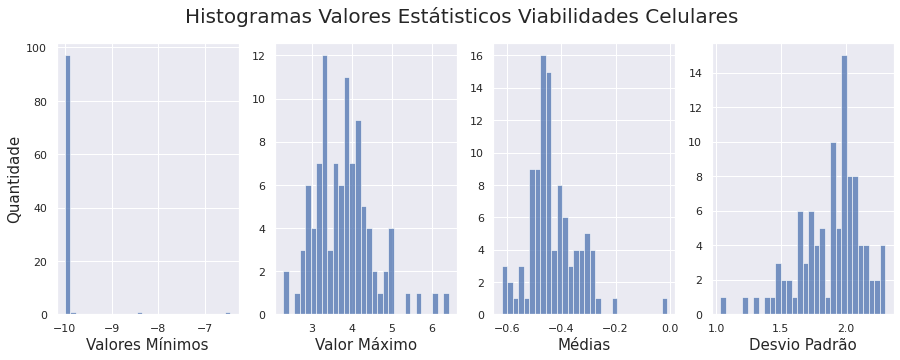

In [ ]:
fig, ax = plt.subplots(1,4,figsize = (15,5))

sns.histplot(x = 'min', data = dados_experimentos.loc[:,'c0':'c99'].describe().T, bins = 30, ax=ax[0])
sns.histplot(x = 'max', data = dados_experimentos.loc[:,'c0':'c99'].describe().T, bins = 30, ax=ax[1])
sns.histplot(x = 'mean', data = dados_experimentos.loc[:,'c0':'c99'].describe().T, bins = 30, ax=ax[2])
sns.histplot(x = 'std', data = dados_experimentos.loc[:,'c0':'c99'].describe().T, bins = 30, ax=ax[3])

ax[0].set_xlabel("Valores Mínimos", fontsize = 15)
ax[0].set_ylabel("Quantidade", fontsize = 15)

ax[1].set_xlabel("Valor Máximo", fontsize = 15)
ax[1].set_ylabel("")

ax[2].set_xlabel("Médias", fontsize = 15)
ax[2].set_ylabel("")

ax[3].set_xlabel("Desvio Padrão", fontsize = 15)
ax[3].set_ylabel("")

fig.suptitle("Histogramas Valores Estátisticos Viabilidades Celulares", fontsize = 20)

plt.show()

####**Existe uma correlação entre os valores ```gn``` e ```cn``` ?**

**"Mas Gustavo, o que é uma correlação?"**

Correlação é a verificação do relacionamento entre variáveis numéricas e seus valores. A correlação é identificada através de um valor entre -1 e 1 e tem os seguintes significados :
- menor que 0 : Correlação negativa (um valor aumenta e outro diminui - Inversamente proporcional)
- igual à 0 : Correlação neutra / não há correlação
- maior que 0 : Correlação positiva (um valor aumenta e outro aumenta - Proporcional)

Temos que ter em mente que **correlação não significa causalidade**. Isso quer dizer que uma variável pode ter correlação com outra, mas não significa que causou isso.

Para essa questão, vamos realizar a filtragem da tabela para utilizarmos apenas as colunas ```gn (0 - 50)``` e ```cn (0 - 50)``` e gravarmos esse resultado em uma nova tabela denominada ```tabela_c_g```.

In [ ]:
tabela_c_g = dados_experimentos.query('tratamento == "com_droga"').filter(regex="^[c|g](50|[0-4][0-9]|[0-9])$")
tabela_c_g

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,g39,...,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709,0.7180
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716,0.0453
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349,-0.3569
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040,-2.8880
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740,0.3559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.2723,-0.3629,1.0820,-0.0352,0.1911,1.0900,0.0008,0.5474,...,0.1678,-0.5853,0.3106,

Após isso, realizamos a criação de uma tabela de correlação (heatmap) e deixamos os valores de g0-g50 nas linhas e c0-c50 nas colunas.

In [ ]:
corr = tabela_c_g.corr()
coor_table_filtrada = corr.loc[:'g50', 'c0':]
coor_table_filtrada.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,c40,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
g0,-0.631908,-0.633972,-0.647684,-0.613628,-0.612773,-0.637636,-0.677327,-0.616219,-0.650315,-0.640832,-0.631267,-0.639009,-0.638204,-0.649221,-0.631769,-0.654796,-0.647906,-0.685883,-0.602646,-0.652285,-0.692599,-0.638388,-0.551494,-0.589398,-0.667832,-0.613271,-0.626699,-0.669674,-0.656304,-0.623334,-0.661569,-0.667790,-0.654234,-0.663180,-0.657777,-0.649266,-0.613794,-0.574442,-0.635751,-0.653988,-0.625254,-0.653620,-0.662391,-0.627147,-0.662955,-0.659771,-0.610167,-0.660685,-0.603942,-0.617839,-0.604046
g1,-0.031841,-0.023024,-0.031111,0.018946,-0.018574,0.003835,-0.019734,0.008728,-0.007597,0.020418,-0.000406,-0.018677,-0.009377,-0.026069,-0.008973,0.012306,-0.012649,-0.016771,0.004802,0.005705,-0.001482,-0.005209,0.064228,0.024969,-0.005086,0.030136,-0.010881,-0.011836,-0.018977,-0.007342,0.002220,-0.028096,-0.012174,-0.004820,0.017972,0.000671,-0.024020,-0.029830,-0.018491,0.008753,-0.024750,-0.003445,0.015599,-0.020082,-0.003708,-0.000775,-0.007487,0.009141,0.003686,0.035052,0.024609
g2,-0.171517,-0.184193,-0.181112,-0.161156,-0.183858,-0.173981,-0.183792,-0.180489,-0.182216,-0.167339,-0.183782,-0.179848,-0.184618,-0.186750,-0.179063,-0.186363,-0.166349,-0.182311,-0.172443,-0.175079,-0.187206,-0.175657,-0.139594,-0.196196,-0.174218,-0.174531,-0.183952,-0.187791,-0.165804,-0.169211,-0.182060,-0.189801,-0.188333,-0.192037,-0.178599,-0.192573,-0.164413,-0.164059,-0.185017,-0.187677,-0.183443,-0.179047,-0.197008,-0.169533,-0.191062,-0.181752,-0.170008,-0.177350,-0.163114,-0.171502,-0.157127
g3,-0.040447,-0.098196,-0.091010,-0.031864,-0.071537,-0.058413,-0.126018,-0.033997,-0.064860,-0.103608,-0.062921,-0.077454,-0.085367,-0.084904,-0.076119,-0.045331,-0.060695,-0.092087,-0.070007,-0.027848,-0.074604,-0.075205,0.071067,-0.004557,-0.064364,-0.008839,-0.116677,-0.072987,-0.090697,-0.040629,-0.061310,-0.103075,-0.044514,-0.097905,-0.046912,-0.051421,-0.082451,-0.035557,-0.106948,-0.030679,-0.089946,-0.049676,-0.070976,-0.072866,-0.067165,-0.078023,-0.034812,-0.073337,-0.062495,-0.036906,-0.014167
g4,-0.418163,-0.390767,-0.404131,-0.370920,-0.374063,-0.397658,-0.375925,-0.390228,-0.396062,-0.358063,-0.389328,-0.395741,-0.392238,-0.397727,-0.409085,-0.392998,-0.401529,-0.400897,-0.351092,-0.407625,-0.419154,-0.390438,-0.330064,-0.364843,-0.404968,-0.383920,-0.365114,-0.418491,-0.393804,-0.394452,-0.387028,-0.403220,-0.429168,-0.377855,-0.404727,-0.395321,-0.395304,-0.371573,-0.375350,-0.400766,-0.392955,-0.398868,-0.370842,-0.405079,-0.399347,-0.402600,-0.368500,-0.405866,-0.360632,-0.362597,-0.373212


E por fim, geramos um gráfico de calor (heatmap) para demonstrar a correlação das variáveis.

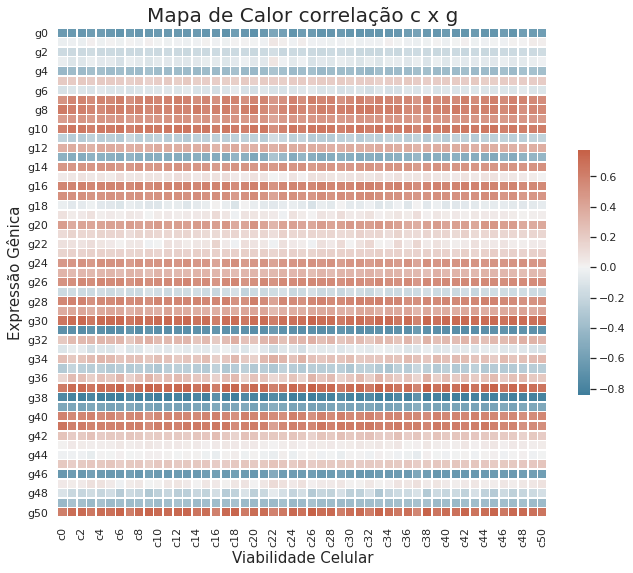

In [ ]:

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(coor_table_filtrada, center=0, cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title("Mapa de Calor correlação c x g", fontsize = 20)
ax.set_ylabel("Expressão Gênica", fontsize = 15)
ax.set_xlabel("Viabilidade Celular", fontsize = 15)

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

Na matriz de correlação podemos verificar algumas situações interessantes para os genes e células :

- Existem genes com uma correlação bem positiva, como por exemplo ```g30``` ou ```g41```. Isso indica que uma alta expressão desse gene está relacionado com a alta viabilidade celular (caso um valor aumente, o outro tende a aumentar).

- Existem genes com uma correlação bem negativa, como por exemplo ```g38```. Isso indica que uma alta expressão do gene pode resultar em uma baixa viabilidade celular (caso um valor aumente, o outro tende a diminuir).

Como observação, gostaria de enfatizar que **relação não implica causalidade**.

Conforme gráfico abaixo, podemos verificar a correlação entre a variável ```g30```e ```c0``` que possui uma correlação positiva, demonstrada pela linha de tendência.

Também notamos a diferença dos valores quando influenciados pelo tempo e pelo tratamento utilizado.

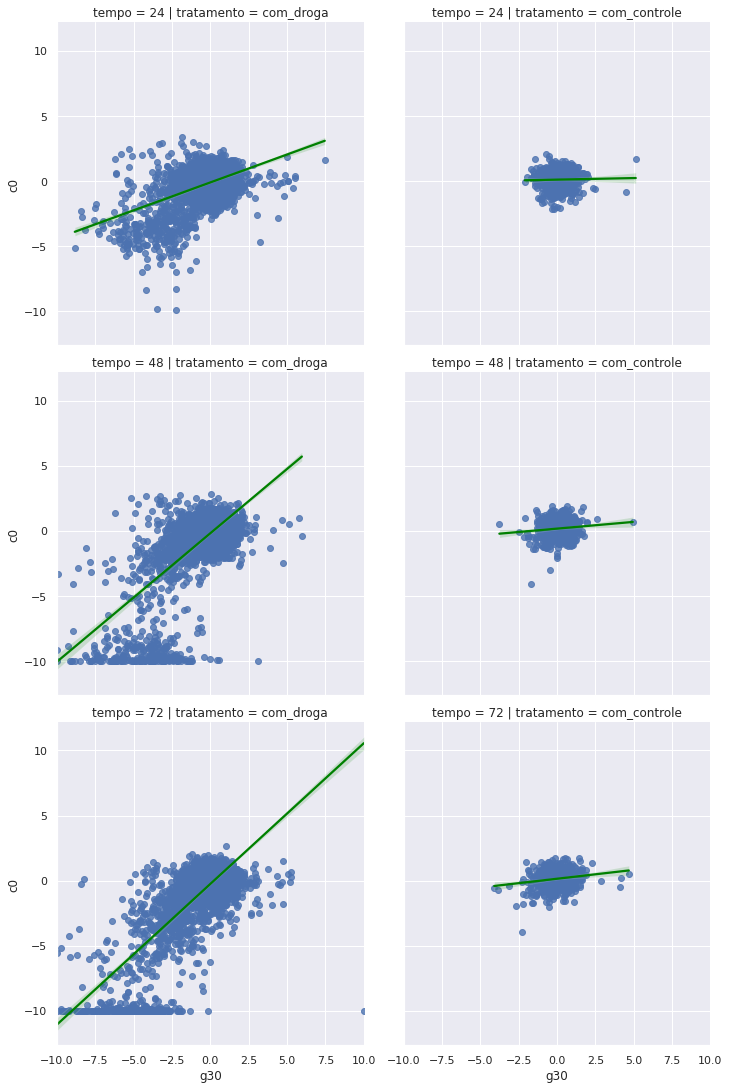

In [ ]:
sns.lmplot(data = dados_experimentos, x = 'g30', y = 'c0', line_kws = {'color'  : 'green'}, col = 'tratamento', row = 'tempo')
plt.show()

Também podemos verificar no gráfico abaixo, a correlação entre a variável ```g38```e ```c0``` que possui uma correlação negativa, demonstrada pela linha de tendência.

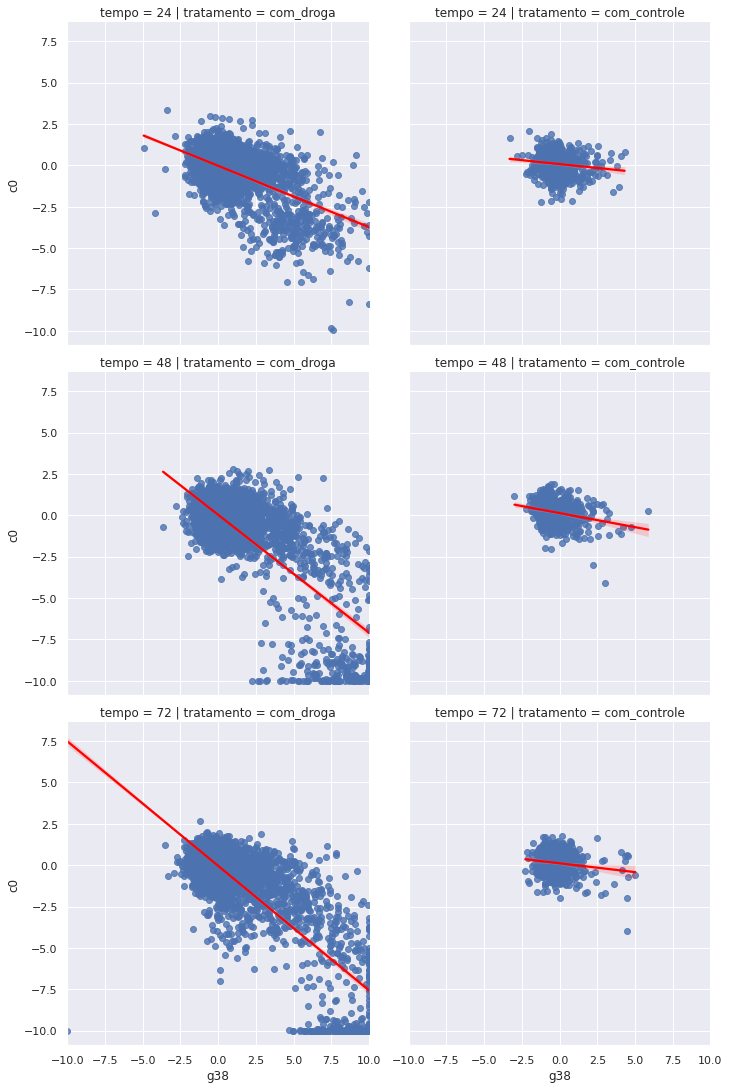

In [ ]:
sns.lmplot(data = dados_experimentos, x = 'g38', y = 'c0', line_kws = {'color'  : 'red'}, col = 'tratamento', row = 'tempo')
plt.show()

####**Dependendo da dose, tratamento e tempo, ocorre alguma diferença nos valores?**

Após a criação dos gráficos abaixo, podemos verificar que a maior mudança na alteração dos valores é quando utilizamos o tratamento "com_droga" ao invés de "com_controle", o qual ocorre o aumento de valores extremos (outliers).

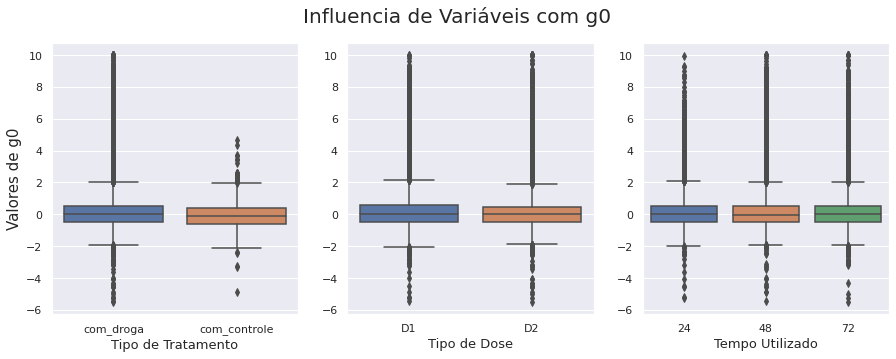

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(y = 'g0', x = 'tratamento', data = dados_experimentos, ax = ax[0])
sns.boxplot(y = 'g0', x = 'dose', data = dados_experimentos, ax = ax[1])
sns.boxplot(y = 'g0', x = 'tempo', data = dados_experimentos, ax = ax[2])

ax[0].set_xlabel('Tipo de Tratamento', fontsize = 13)
ax[1].set_xlabel('Tipo de Dose', fontsize = 13)
ax[2].set_xlabel('Tempo Utilizado', fontsize = 13)

ax[0].set_ylabel('Valores de g0', fontsize = 15)
ax[1].set_ylabel('')
ax[2].set_ylabel('')

fig.suptitle('Influencia de Variáveis com g0', fontsize = 20)
plt.show()

Abaixo, também podemos verificar uma análise mais detalhada quando utilizado um composto específico (nesse caso, 87d714366) e quando utilizado apenas o controle.

Podemos identificar que ocorre um aumento nos valores da expressão gênica ```g0``` e não segue uma média padronizada como quando utilizado apenas o tratamento com controle.

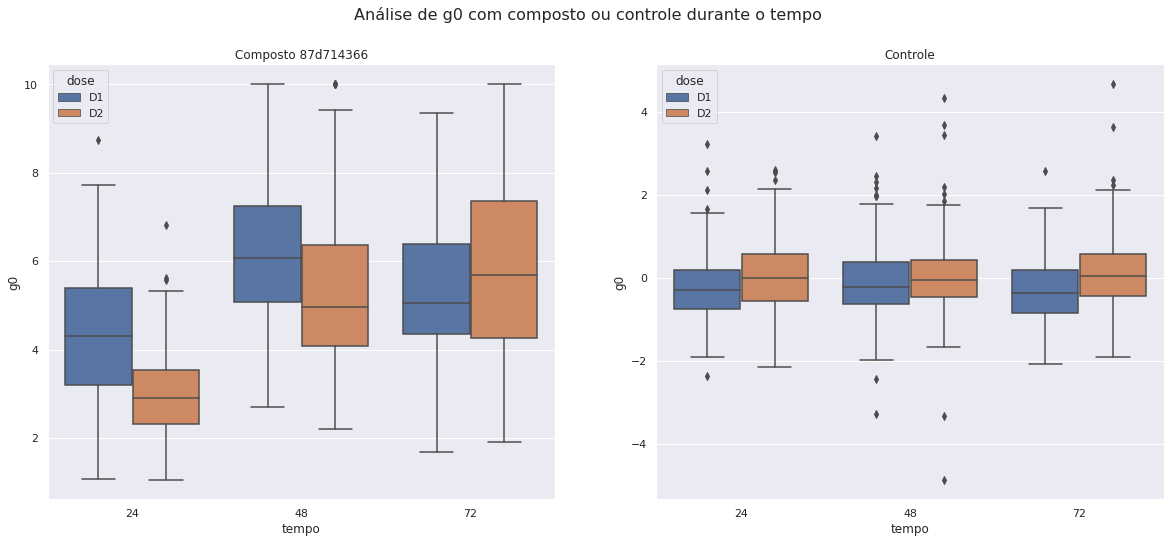

In [ ]:
composto = dados_experimentos[dados_experimentos['composto']=='87d714366']
controle = dados_experimentos.query('tratamento == "com_controle"')

fig, axes = plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data=composto, y='g0', x='tempo', hue='dose',ax=axes[0])
axes[0].set_title('Composto 87d714366')

sns.boxplot(data=controle, y='g0', x='tempo', hue='dose',ax=axes[1])
axes[1].set_title('Controle')

fig.suptitle('Análise de g0 com composto ou controle durante o tempo', fontsize = 16)
fig.show()

###**4.2 Análise Exploratória Dados MoA**

Finalizada a exploração nos Dados de Experimentos, vamos buscar entender melhor as nossas variáveis da nossa tabela Dados MoA (Mecanismos de Ação).

Mas antes, vamos verificar novamente o que temos presente em nossa base de dados :

In [ ]:
dados_MoA.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


A primeira coluna tem o nome de "id", o que nos remete a um identificador.

As seguintes colunas possuem nomes bem complexos, esses dados nos trazem a relação do mecanismo de ação do alvo (enzima (terminados com -ase), proteína, etc) com a droga utilizada.

- Agonista refere-se às ações ou estímulos provocados por uma resposta, referente ao aumento (ativação) ou diminuição (inibição) da ativade celular.
- Antagonistas agem como bloqueadores dos receptores, diminuindo as respostas dos neurotransmissores presentes no organismo, podendo diminuir ou anular o efeito do agonista.

Cada linha da nossa base de dados é um resultado do experimento da tabela que trabalhamos anteriormente. Quando um MoA é ativado, ele é indicado como 1. Quando esse mecanismo não é ativado, ele é detectado como 0.



Agora nesse ponto, vamos realizar a Análise Exploratória, onde primeiramente vamos realizar a soma das colunas para identificar os mecanismos que foram mais ativados em nossa base de dados.

Vamos formular as seguintes situações para analisarmos os nossos dados :
- **Analisar o Top 10 das ações MoA (inibidor, agonista, antagonista...)**
- **Algum composto, dependendo da configuração do experimento (dose, tempo) realiza a ativação de um número diferentes de MoA?**
- **No tratamento com controle tivemos a execução de algum MoA?**
- **Há o risco de receber um tratamento com drogas e não ativar algum MoA?**

####**Analisar o Top 10 das ações MoA (inibidor, agonista, antagonista...)**


Realizando a soma de valores por coluna que tiveram o valor 1 (ativação do MoA) podemos identificar que há uma alta presença de mecanismos de ações inibidores no topo.

In [ ]:
contagem_moa = dados_MoA.drop('id', axis = 1).sum().sort_values(ascending = False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Conforme gráfico abaixo, podemos notar que de fato há uma superioridade notória na quantidade de mecanismos de ações inibidores que foram ativados em relação aos outros, estando no topo com 9693 ocorrências.

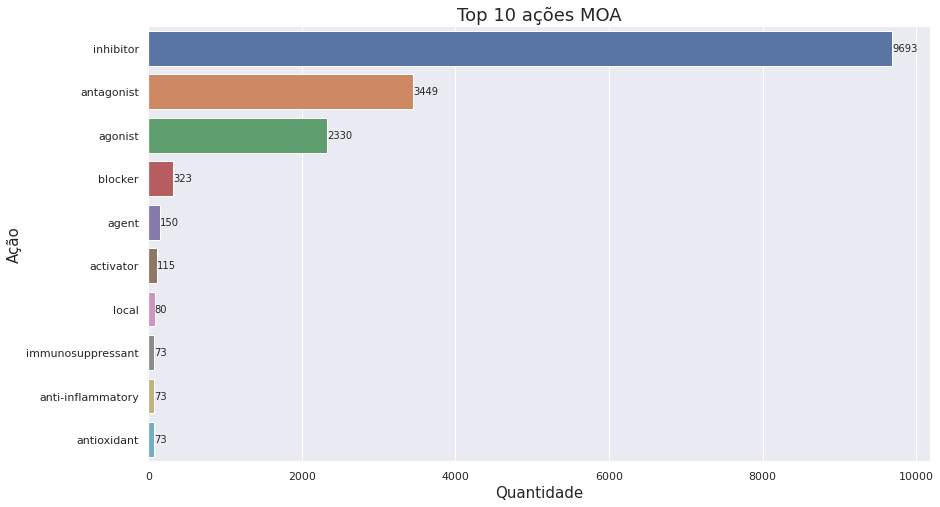

In [ ]:
dados_MoA_sufix = [name.split('_')[-1] for name in contagem_moa.index]
dados_MoA_sufix_count = pd.DataFrame(data={'acao':dados_MoA_sufix,'contagem':contagem_moa.values})
top10_acoes = dados_MoA_sufix_count.groupby(by=['acao']).sum()['contagem'].sort_values(ascending=False)[:10]

plt.figure(figsize = (14,8))

ax = sns.barplot(x = top10_acoes.values, y = top10_acoes.index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center') 

plt.title('Top 10 ações MOA', fontsize = 18)
plt.ylabel('Ação', fontsize = 15)
plt.xlabel('Quantidade', fontsize = 15)

plt.show()

A título de curiosidade, também trouxe os gráficos referentes à quantidade de ocorrências por categoria de MoA.

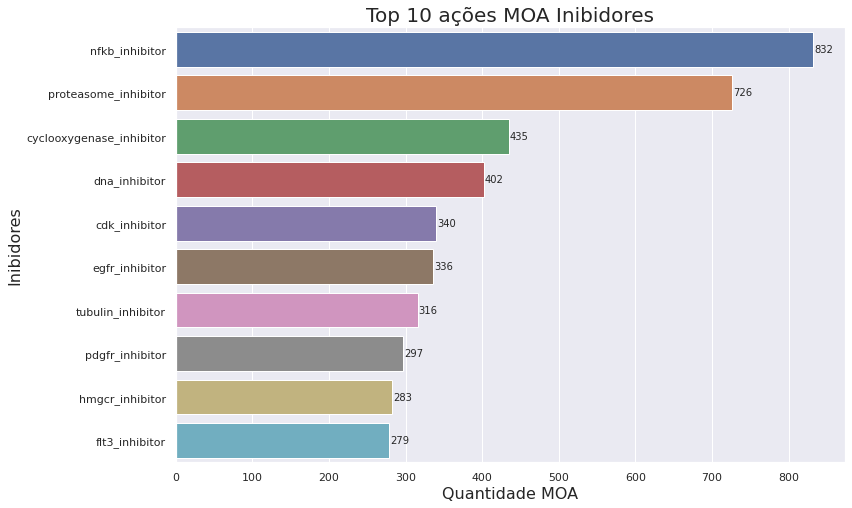

In [ ]:
dados_MoA_inhibitor = dados_MoA.filter(regex = '(inhibitor)')
top10_dados_MoA_inhibitor = dados_MoA_inhibitor.sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,8))

ax = sns.barplot(x = top10_dados_MoA_inhibitor.values, y = top10_dados_MoA_inhibitor.index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

plt.xlabel("Quantidade MOA", fontsize = 16)
plt.ylabel("Inibidores", fontsize = 16)
plt.title("Top 10 ações MOA Inibidores", fontsize = 20)
plt.show()

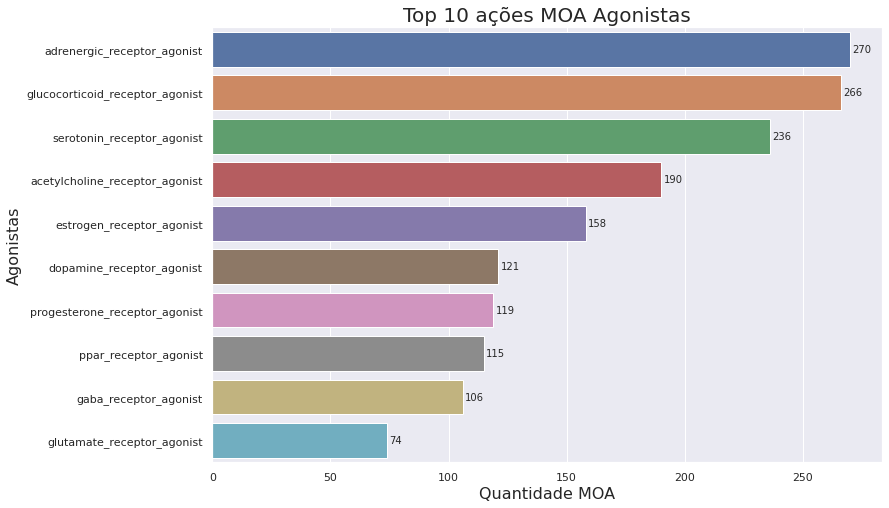

In [ ]:
dados_MoA_agonist = dados_MoA.filter(regex = '(?:^|_)agonist(?:$|\W)')
top10_dados_MoA_agonist = dados_MoA_agonist.sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,8))
ax = sns.barplot(x = top10_dados_MoA_agonist.values, y = top10_dados_MoA_agonist.index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

plt.xlabel("Quantidade MOA", fontsize = 16)
plt.ylabel("Agonistas", fontsize = 16)
plt.title("Top 10 ações MOA Agonistas", fontsize = 20)
plt.show()

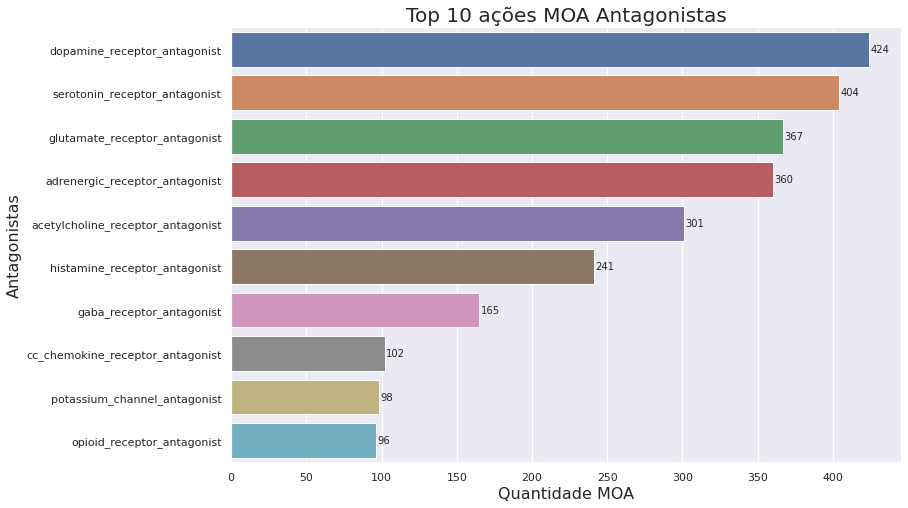

In [ ]:
dados_MoA_antagonist = dados_MoA.filter(regex = '(?:^|_)antagonist(?:$|\W)')
top10_dados_MoA_antagonist = dados_MoA_antagonist.sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,8))
ax = sns.barplot(x = top10_dados_MoA_antagonist.values, y = top10_dados_MoA_antagonist.index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

plt.xlabel("Quantidade MOA", fontsize = 16)
plt.ylabel("Antagonistas", fontsize = 16)
plt.title("Top 10 ações MOA Antagonistas", fontsize = 20)

plt.show()

Podemos notar no gráfico abaixo, onde não há presença de inibidores, antagonistas e agonistas que há uma grande presença da ativação do MoA ```calcium_channel_blocker``` com 281 ocorrências.

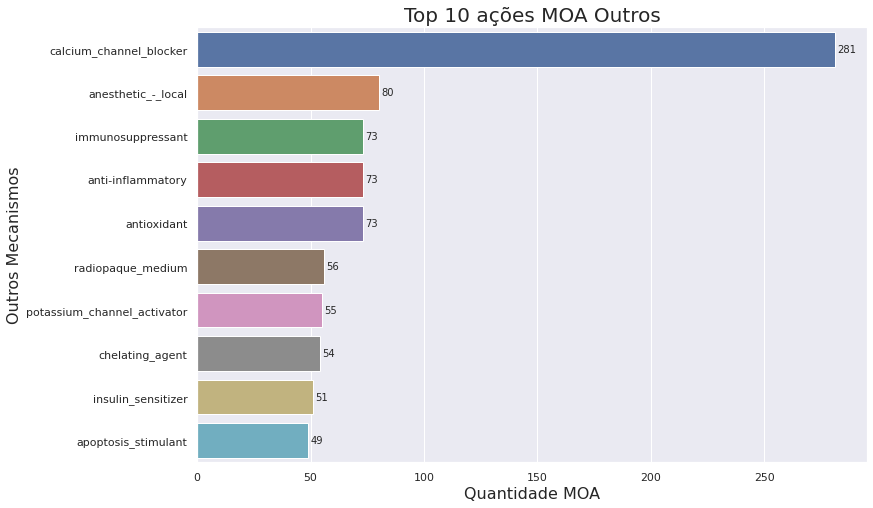

In [ ]:
dados_MoA_outros = dados_MoA[dados_MoA.columns[dados_MoA.columns.str.contains('inhibitor|agonist', regex=True) == False]]
top10_dados_MoA_outros = dados_MoA_outros.drop(['id'], axis = 1).sum().sort_values(ascending = False).head(10)

plt.figure(figsize = (12,8))
ax = sns.barplot(x = top10_dados_MoA_outros.values, y = top10_dados_MoA_outros.index)

for p in ax.patches:
    width = p.get_width()    
    ax.text(width + 1,       
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width), 
            ha = 'left',   
            va = 'center')

plt.xlabel("Quantidade MOA", fontsize = 16)
plt.ylabel("Outros Mecanismos", fontsize = 16)
plt.title("Top 10 ações MOA Outros", fontsize = 20)

plt.show()

####**Algum composto, dependendo da configuração do experimento (dose, tempo) realiza a ativação de um número diferentes de MoA?**

Para responder esse questionamento, vamos realizar a criação de uma variável denominada ```n_moa```(quantidade de MoA que foram ativados) e ```ativo_moa```(se foi ativado ou não um MoA) em nossa base de dados MoA e depois repassarmos para uma nova base de dados chamada ```dados_combinados````.

In [ ]:
# Criação das 2 novas colunas / variáveis
dados_MoA['n_moa'] = dados_MoA.drop('id', axis = 1).sum(axis = 1)
dados_MoA['ativo_moa'] = (dados_MoA['n_moa'] != 0)

# Junção das tabelas e criação da nova tabela 'dados_combinados'
dados_combinados = pd.merge(dados_experimentos, dados_MoA[['id', 'n_moa', 'ativo_moa']], on = 'id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Após a criação da tabela ```dados_combinados``` podemos realizar um agrupamento por composto e filtrarmos pela coluna ```n_moa```, retirando o número de valores únicos e realizando uma contagem para todos.

O resultado abaixo significa que temos 1 valor único para todos os 3289 compostos, não sendo alterado pelas configurações (dose, tempo) de nosso experimento.

In [ ]:
dados_combinados.groupby('composto')['n_moa'].nunique().value_counts()

1    3289
Name: n_moa, dtype: int64

Abaixo, realizei a criação de um gráfico dos 15 compostos mais utilizados com diferentes valores de tempo e dose para demonstrar que não ocorre a alteração do número de MOA (Mecanismo de Ação do Alvo - interação entre a droga utilizada e um alvo).

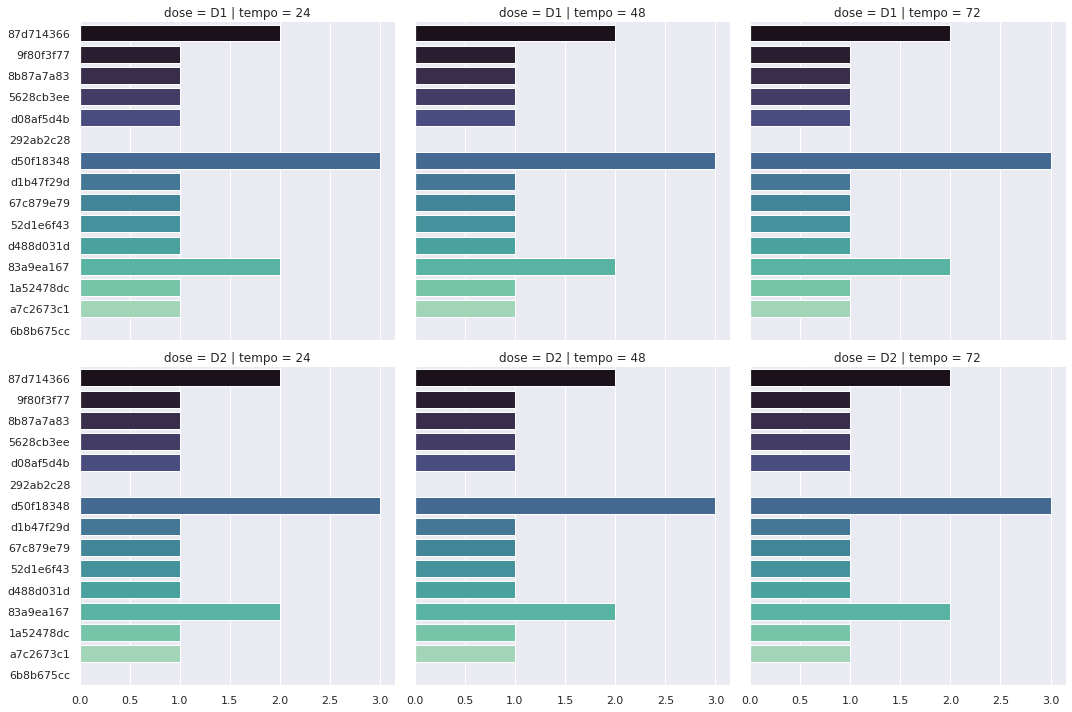

In [ ]:
top15_compostos_droga = dados_combinados.query('tratamento == "com_droga"')['composto'].value_counts().index[:15]
top15_compostos_droga

fig = sns.FacetGrid(dados_combinados.query('composto in @top15_compostos_droga'), col="tempo",  row="dose", height=5)
fig.map_dataframe(sns.barplot, y="composto", x = "n_moa", order = top15_compostos_droga, palette = 'mako')

plt.show()

####**No tratamento com controle tivemos a execução de algum MoA?**

Não! Conforme comando abaixo, podemos verificar que todos os valores retornam Falso para a coluna ```ativo_moa``` nos tratamentos com controle.

In [ ]:
dados_combinados.query('tratamento == "com_controle"')['ativo_moa'].value_counts()

False    1866
Name: ativo_moa, dtype: int64

####**Há o risco de receber um tratamento com drogas e não ativar algum MoA?**

Sim! Conforme resultado abaixo, podemos verificar que 14447 experimentos com drogas tiveram mecanismos de ações ativados e 7501 não foram ativados.

In [ ]:
dados_combinados.query('tratamento == "com_droga"')['ativo_moa'].value_counts()

True     14447
False     7501
Name: ativo_moa, dtype: int64

#**5. Criação do Modelo de Machine Learning**

Após realizarmos a nossa Análise Exploratória, é hora de realizarmos a criação do nosso modelo de Machine Learning!

####**"Você pode explicar o que é Machine Learning, Gustavo?"**
Sim, eu posso! Para entendermos o que é Machine Learning, trouxe a definição clássica de um renomado e importante Ciêntista da Computação, o [Arthur Samuel](https://pt.wikipedia.org/wiki/Arthur_Samuel), um dos pioneiros na área de Inteligência Artificial.

**"Machine Learning é um campo de estudo que dá aos computadores a habilidade de aprender sem terem sido programados para tal." - (definição traduzida de Arthur Samuel, cientista da computação, 1959)**

Podemos interpretar a definição de Samuel, da seguinte forma : para que um computador reconheça determinada imagem, não precisamos passar um conjunto de regras, demonstrar exemplos é suficiente para que o computador classifique as imagens. Sendo assim, temos dois fatores que foram determinantes para o avanço da Machine Learning no século XXI (21) : o Big Data (dados gerados em grande escala em uma velocidade absurda) e o poder computacional cada vez mais elevados!

Como objetivo do nosso problema, iremos utilizar a nossa base de dados combinados para resolvar a questão : **dado os experimentos, queremos saber se qualquer mecanismo foi ativado ou não.**

In [ ]:
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Primeiro, vamos realizar a construção de 4 novas colunas, para repassar os valores de "tratamento", "tempo" e "dose" para números binários (0 e 1) para auxiliar na construção do nosso modelo.

- tempo_24 : 1 caso tempo igual à 24
- tempo_48 : 1 caso tempo igual à 48
- tempo_72 : 1 caso tempo igual à 72
- eh_controle : 1 caso tratamento igual à com_controle

In [ ]:
dados_combinados['eh_controle'] = (dados_combinados['tratamento'] == 'com_controle').astype(int)
dados_combinados['tempo_24'], dados_combinados['tempo_48'], dados_combinados['tempo_72'] = (dados_combinados['tempo'] == 24).astype(int), (dados_combinados['tempo'] == 48).astype(int), (dados_combinados['tempo'] == 72).astype(int)

dados_combinados[['tempo', 'tempo_24', 'tempo_48', 'tempo_72', 'tratamento','eh_controle']]

,tempo,tempo_24,tempo_48,tempo_72,tratamento,eh_controle
0,24,1,0,0,com_droga,0
1,72,0,0,1,com_droga,0
2,48,0,1,0,com_droga,0
3,48,0,1,0,com_droga,0
4,72,0,0,1,com_droga,0
...,...,...,...,...,...,...
23809,24,1,0,0,com_droga,0
23810,24,1,0,0,com_droga,0
23811,48,0,1,0,com_controle,1
23812,24,1,0,0,com_droga,0


###**5.1 Separação Dados de Treino e Teste**

Quando realizamos a implementação de um modelo de classificação, precisamos separar a nossa base de dados em base de treino e base de teste.

A base de treino será onde o nosso modelo irá aprender sobre os dados e a base de teste serve para verificarmos o quanto o nosso modelo aprendeu.

Para realizar a separação dos dados, devemos definir quais serão os nossos valores ```x``` e ```y```, sendo :
- x = Variáveis preditoras (colunas que serão utilizadas para previsão da variável target)
- y = Variável target (coluna que será prevista através das variáveis preditoras)

Visto que queremos prever a ocorrência ou não de qualquer mecanismo, a variável target (y) em nosso exemplo será ```ativo_moa```, que retorna False (caso não tenha ativado) ou True (caso tenha ativado).

Para a nossas variáveis preditoras, utilizaremos os valores das colunas ```gn``` e ```cn```.

A proporção de divisão varia de acordo com o volume de dados que temos, mas normalmente é utilizado 70% treino e 30% teste.

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

###**5.2 Criação do Modelo de Machine Learning**

Após a definição de nossas variáveis e teste, iremos utilizar um modelo de [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica). 

Esse modelo é frequentemente utilizado para realizarmos a predição de valores tomados por uma variável categórica, frequentemente binária (2 opções).

In [ ]:
x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

modelo_rlogistica1 = LogisticRegression(max_iter = 1000)
modelo_rlogistica1.fit(x_treino, y_treino) # Realizamos o treinamento do modelo

print(f'O nosso modelo de Regressão Logística (modelo_rlogistica1) teve uma taxa de acerto de aproximadamente {round(modelo_rlogistica1.score(x_teste, y_teste),4) * 100}%') # Realizamos a verificação da % de acertos do modelo com os dados de teste

O nosso modelo de Regressão Logística (modelo_rlogistica1) teve uma taxa de acerto de aproximadamente 62.67%


Hummm... o nosso primeiro modelo de Regressão Logística conseguiu realizar a previsão da ocorrência de Mecanismos de Ação em 63.0%.

####**Mas Gustavo, como sabemos se esse é um valor alto de previsão?**
Para saber se temos um bom valor de acurácia, precisamos de uma base comparativa, quer dizer, de resultados de outro modelo para entender se estamos acertando mais ou menos casos.

Para isso, podemos utilizar um outro algoritmo que utiliza modelos menos complexos. Neste caso, vamos usar o ```DummyClassifier```.

Conforme podemos verificar, o nosso modelo utilizando o ```DummyClassifier``` possuiu uma taxa de acerto de 60.68%, tendo uma acurácia um pouco menor quando comparado com o modelo de regressão logística (62.67%).

In [ ]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)

print(f'O nosso modelo utilizando o Dummy Classifier (modelo_dummy) teve uma taxa de acerto de aproximadamente {round(accuracy_score(y_teste, previsao_dummy),4) * 100}%')

O nosso modelo utilizando o Dummy Classifier (modelo_dummy) teve uma taxa de acerto de aproximadamente 60.68%


#### **E Gustavo, temos como melhorar mais ainda a nossa acurácia?**

Sim! Podemos testar diversas opções na hora de realizarmos a criação do nosso Modelo de Machine Learning, isso iremos verificar no próximo Capítulo!

#**6. Otimização do Modelo de Machine Learning**

Nessa etapa de otimização do modelo de Machine Learning, podemos realizar diversos testes para verificar se conseguimos aumentar a taxa do nosso modelo, como por exemplo :
- Utilização de outras variáveis preditoras (valores x).
- Utilização de outros algoritmos de Machine Learning.
- Alteração de parâmetros nos algoritmos de Machine Learning (necessário um conhecimento mais avançado)

###**6.1 Utilização de outras variáveis preditoras**

Como primeiro teste, iremos realizar a criação do nosso modelo utilizando variáveis preditoras (valores x) diferentes em relação aos modelos criados anteriormente, onde utilizamos apenas os valores das colunas ```gn``` e ```cn```.

In [ ]:
# Nessa primeira situação, iremos utilizar as variáveis gn, cn, eh_controle, tempo_24, tempo_48 e tempo_72 junto com o algoritmo LogisticRegression() e com o DummyClassifier() utilizado anteriormente.

# Separação dos Dados em Treino e Teste
x = dados_combinados.drop(['id', 'ativo_moa', 'n_moa', 'tratamento', 'dose', 'composto', 'tempo'], axis=1)
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

# Modelo Logistic Regression
modelo_rlogistica2 = LogisticRegression(max_iter = 1000)
modelo_rlogistica2.fit(x_treino, y_treino)
print(f'O nosso modelo de Regressão Logística (modelo_rlogistica1) teve uma taxa de acerto de aproximadamente {round(modelo_rlogistica2.score(x_teste, y_teste),4) * 100}%')

# Modelo Dummy Classifier
modelo_dummy2 = DummyClassifier('most_frequent')
modelo_dummy2.fit(x_treino, y_treino)
previsao_dummy2 = modelo_dummy2.predict(x_teste)
print(f'O nosso segundo modelo utilizando o Dummy Classifier (modelo_dummy2) teve uma taxa de acerto de aproximadamente {round(accuracy_score(y_teste, previsao_dummy2),4) * 100}%')


O nosso modelo de Regressão Logística (modelo_rlogistica1) teve uma taxa de acerto de aproximadamente 66.64%
O nosso segundo modelo utilizando o Dummy Classifier (modelo_dummy2) teve uma taxa de acerto de aproximadamente 60.68%


E olhe só! Realizando a alteração das variáveis preditoras, conseguimos realizar um aumento na taxa de acerto de 62.67% para 66.64% utilizando a Regressão Logística!

####**6.2 Utilização de outros algoritmos de Machine Learning**

Após a realização da utilização de outras variáveis preditoras, verificamos que conseguimos um aumento de 62.67% para 66.64% na taxa de acerto do nosso modelo de Machine Learning.

Nessa segunda etapa, iremos realizar a utilização de outros algoritmos de Machine Learning para classificação, como por exemplo, o [RandomForest](https://didatica.tech/o-que-e-e-como-funciona-o-algoritmo-randomforest/).

In [ ]:
# Nessa primeira situação, iremos utilizar as variáveis gn, cn, eh_controle, tempo_24, tempo_48 e tempo_72 junto com o novo algoritmo RandomForest

# Separação dos Dados em Treino e Teste
x = dados_combinados.drop(['id', 'ativo_moa', 'n_moa', 'tratamento', 'dose', 'composto', 'tempo'], axis=1)
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

modelo_randomForest1 = RandomForestClassifier()
modelo_randomForest1.fit(x_treino, y_treino)
print(f'O nosso modelo utilizando o Random Forest (modelo_randomForest1) teve uma taxa de acerto de aproximadamente {round(modelo_randomForest1.score(x_teste, y_teste),4) * 100}%')

O nosso modelo utilizando o Random Forest (modelo_randomForest1) teve uma taxa de acerto de aproximadamente 68.11%


Conseguimos realizar o aumento na taxa de acerto de 66.64% para 67.54% realizando a alteração do nosso modelo utilizado! Mas será que conseguimos melhorar um pouquinho mais esse número?

Para a criação do próximo modelo, iremos utilizar todas as variáveis, exceto :
    
    'id'  ->  não será relevante nesse momento pois é somente um número de identificação
    'n_moa'  ->  não será relevante nesse momento pois é a quantidade de MoAs ativados
    'ativo_moa'  ->  retiramos da base pois é a nossa variável resposta
    'composto'  ->  não será relevante nesse momento pois identifica o composto usado e foge do que estamos buscando fazer

Como o nosso modelo de Random Forest não aceita variáveis em formato de string (caracteres), iremos utilizar uma função que transforma os valores das colunas ```tempo```, ```dose``` e ```tempo``` em valores lógicos (0 - ausência e 1 - presença do valor).

In [ ]:
x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis = 1)
x = pd.get_dummies(x, columns = ['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify=y, random_state=376)

modelo_randomForest2 = RandomForestClassifier()
modelo_randomForest2.fit(x_treino, y_treino)
print(f'O nosso segundo modelo utilizando o Random Forest (modelo_randomForest2) teve uma taxa de acerto de aproximadamente {round(modelo_randomForest2.score(x_teste, y_teste),4) * 100}%')

O nosso segundo modelo utilizando o Random Forest (modelo_randomForest2) teve uma taxa de acerto de aproximadamente 68.13%


Após a inclusão de todos os valores, exceto as colunas ```id```, ```n_moa```, ```ativo_moa``` e ```composto``` conseguimos aumentar a taxa do nosso modelo de 68.11% para 68.13%. Isso é muito bom se compararmos com o nosso primeiro de 60.68%!

Por fim, vamos demonstrar as variáveis que o nosso modelo considerou mais importantes para determinar se um mecanismo de ação foi ativado ou não em um experimento.

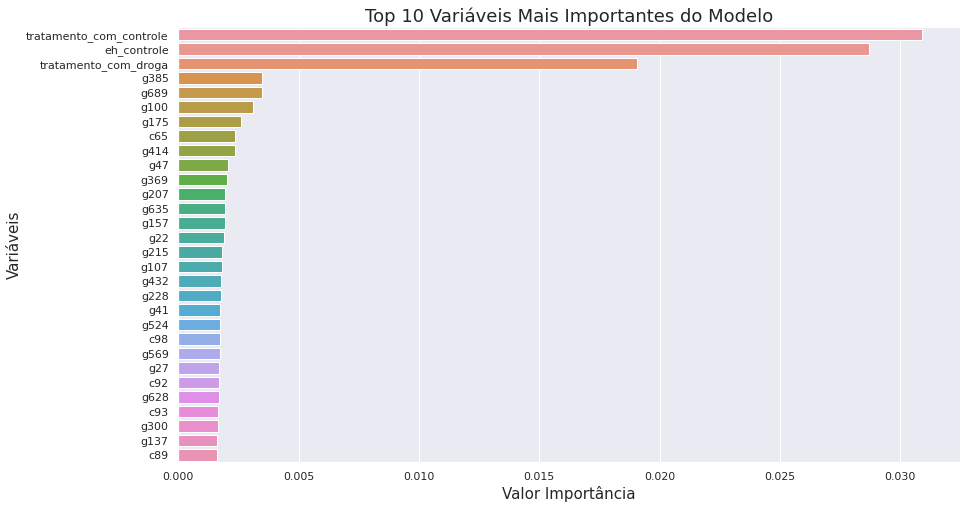

In [ ]:
max_values_30_idx = pd.Series(modelo_randomForest2.feature_importances_).sort_values(ascending = False)[:30].index

plt.figure(figsize = (14,8))

ax = sns.barplot( x = modelo_randomForest2.feature_importances_[max_values_30_idx] , y = x.columns[max_values_30_idx])

plt.title('Top 10 Variáveis Mais Importantes do Modelo', fontsize = 18)
plt.ylabel('Variáveis', fontsize = 15)
plt.xlabel('Valor Importância', fontsize = 15)

plt.show()

E olhem só que legal! Podemos verificar no gráfico que as variáveis mais importantes para a construção nosso modelo são as que justamente alteravam mais os valores das nossas expressões gênicas e viabilidades celulares que vimos na fase de análise exploratória, o tipo de tratamento utilizado (com droga ou com controle).

Para melhorar cada vez mais o modelo, poderíamos utilizar outros algoritmos de Machine Learning voltados para a classificação, realizar alterações nos parâmetros desses algoritmos ou combinarmos novas variáveis para a variável preditoria.

#**7. Conclusão**

Com a análise exploratória dos nossos dados, identificamos que nos experimentos foram utilizados 3289 tipos diferentes de drogas, onde tivemos doses diferentes aplicadas (D1 e D2) e cada experimento foi analisado em tempos diferentes (24h, 48h e 72h) sendo 48h a mais utilizada.

Também aprendemos que os valores da expressão gênica (gn) possuem uma distribuição normal (maior quantidade de valores no meio) quando plotados os gráficos da média. Também identificamos que seus dados provavelmente foram normalizados para trabalharem em um intervalo de [-10, 10].

Outra verificação importante foi a diferença nos valores das expressões gênicas utilizando um tratamento com droga e quando utilizamos um tratamento com controle. Outra situação interessante foi a verificação de que apenas 8 compostos ultrapassavam a quantidade de 100x utilizados nos experimentos.

Aprendemos também que existem correlações entre as variáveis de expressão gênica e viabilidade celular, identificando genes que podem influenciar positivamente ou negativamente na viabilidade celular. Lembrando mais uma vez que **correlação não é causalidade**.

Realizamos também a criação de modelos de Machine Learning diferentes para a previsão da nossa variável target (y), onde, o modelo Random Forest se sobressaiu melhor, conseguindo uma taxa de acerto de 68.36% dos nossos dados.

Como esse Notebook é para fins de estudo, para a utilização no cotidiano teríamos que elevar ainda mais a % da taxa de acerto do nosso modelo para minimizarmos os erros e auxiliarmos a área de Drug Discovery.

#**8. Agradecimentos**

Gostaria também de agradecer à [Alura](https://www.alura.com.br/) por trazer um tema para a Imersão de Dados 2021, que eu não havia conhecimento que podíamos utilizar a Ciência de Dados. 

Também gostaria de agradecer os professores da Imersão de Dados, [Thiago Gonçalves](https://www.linkedin.com/in/thiago-gon%C3%A7alves-santos/), [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/) e [Vanessa Leiko](https://www.linkedin.com/in/vanessa-leiko-oikawa-cardoso/), que conseguiram explicar cada conceito perfeitamente, tanto da parte de Ciência de Dados e da parte de Biologia. 